# Advanced Density Estimation

-----

In this notebook, we explore more advanced aspects of Kernel Density Estimation, or KDE. First, we introduce the use of the scikit learn module to perform kernel density estimation, which provides a model representation of the computed KDE. We first apply this method to the IRIS dataset, then explore multivariate KDE, for which we also introduce new visualization techniques that use KDE to improve the understanding of multi-dimensional data. Finally, we introduce a handwritten image dataset, and use the scikit learn module to build a sixty-four-dimensional model of this data set, which we use to generate new, artificial images. This last step can be used both as an aid to understanding a data set and the KDE model representation, and also for data augmentation.

-----

In [1]:
# Set up notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

# Load the Iris Data
iris = sns.load_dataset("iris")

-----

## Scikit Learn KDE

While we can compute a KDE on our own, the scikit learn library provides a [kernel density estimation][skkde] implementation that is easy to use, flexible, and scalable to large data. Given our previous experience with this library, using a KDE in scikit learn will be familiar. We simply import the KDE estimator, create the estimator with appropriate parameters, and fit the estimator with the data. The estimator can be used as a function; passing in [independent variables][wid] (i.e., $x$) generates values for the dependent variables (i.e., $y$). 

In the following code cell, we use scikit learn to generate a KDE for our Iris _Sepal Length_ features. In the first example, we use the same bandwidth calculated in the Seaborn example from the [Introduction to Density Estimation](introde.ipynb) notebook, which ensures we will create the same KDE. Note that we create the KDE estimator and sample this function across the support to plot the function. In the second code cell, we sample from this function to simply extract estimates from our new model representation.

-----

[skkde]: http://scikit-learn.org/stable/modules/density.html
[wid]: https://en.wikipedia.org/wiki/Dependent_and_independent_variables

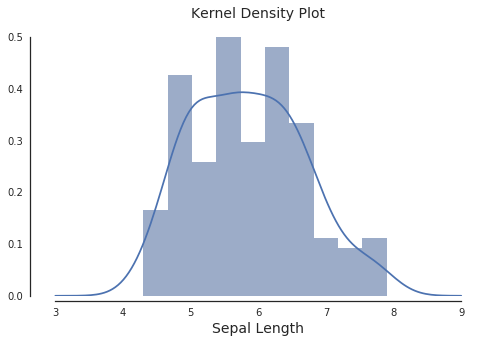

In [2]:
# Now repeat the process by using scikit learn
from sklearn.neighbors import KernelDensity

data = iris['sepal_length'].as_matrix()
bw = 1.06 * data.std() * len(data) ** (-1 / 5.)

# Gaussian KDE with Seaborn bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=bw)

# Grab the data, and compute the support (sampling points)
x = iris['sepal_length']
support = np.linspace(3, 9, len(x))

# Create the KDE, and return the support values.
kde.fit(x[:, np.newaxis])
y = kde.score_samples(support[:, np.newaxis])

# Plot the results including underlying histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True)
ax.plot(support, np.exp(y))
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)

In [3]:
# We can now sample from the scikit learn KDE model
for val in kde.sample(n_samples=15):
    print('{0:4.1f}, '.format(val[0]), end='')

 5.1,  7.1,  5.4,  6.2,  5.3,  7.9,  4.9,  5.2,  5.6,  4.6,  5.6,  5.3,  6.5,  5.0,  5.4, 

----

### Bandwidth Selection

Given the choice of a kernel function, which is commonly just the
Gaussian kernel, the next most important decision is the bandwidth. To
this point, we have used the Seaborn default value, but as with any
machine learning technique, we can vary this parameter and produce
(sometimes dramatically) different results. In the following code cell,
we generate multiple KDEs for the same dataset by simply varying the
bandwidth. Notice how, in the same manner as a histogram, smaller
bandwidths can be affected by any fluctuations in the data while larger
bandwidths can overly smooth features in the data, thus demonstrating
the importance of selecting this parameter appropriately.

----

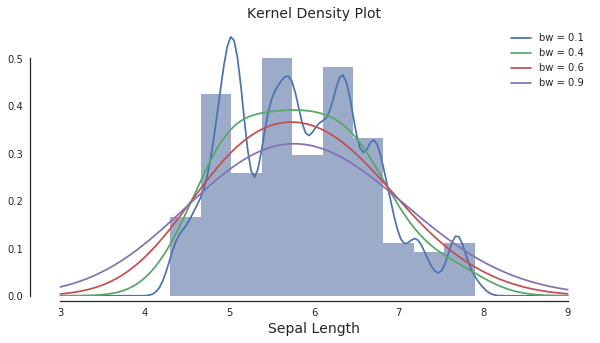

In [4]:
# Compare the impact of bandwidth selection on a KDE
from sklearn.neighbors import KernelDensity

# Make plots
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')

# Gaussian KDE with varying bandwidths
for bw in np.linspace(0.1, 0.9, 4):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde.fit(x[:, np.newaxis])
    y = kde.score_samples(support[:, np.newaxis])
    ax.plot(support, np.exp(y), label='bw = {0:3.1f}'.format(bw))

# Decorate plot
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)
plt.legend()

sns.despine(offset=5, trim=True)

----

## Multi-Variate KDE

To this point, we have performed density estimation in a single dimension. Often, however, we will be working with multi-variate datasets and wish to compute a density estimation in more than one dimension. The KDE technique, however, can be easily extended to additional dimensions. To demonstrate both the need and application of density estimation in more than one dimension, we now switch to a visualization of both the Iris data _Sepal Length_ and _Sepal Width_. In the following figure, we display a joint plot of these two features by using Seaborn's `jointplot` function. This plot shows the points and the horizontal and vertical axes displays the one dimensional histogram of the features.

-----

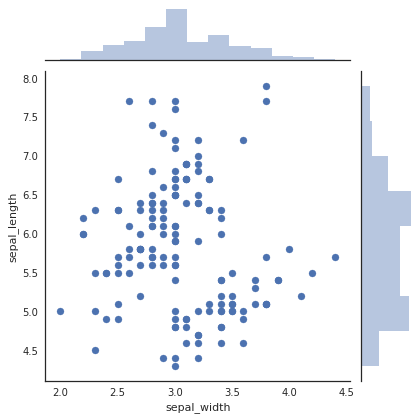

In [5]:
# Plot two-dimension data.
# A Seaborn jointplot has histograms and scatter points

ax = sns.jointplot(x='sepal_width', y='sepal_length', data=iris, stat_func=None)

-----

While this plot provides a visual representation of the underlying data,
we face the same issues as before. Both histograms are binned quantities
and the scatter plot can be overwhelmed by data points, making a visual
understanding of the density difficult. To clarify these points, we can
generate both one-dimensional KDEs for the density distributions in each
dimension as well as a two-dimensional KDE for the joint data
distribution. To make a higher order KDE, we simply use higher order
kernel functions (e.g., a two-dimensional Gaussian kernel function). The
following figure demonstrates the use of a two-dimensional KDE to better
represent the underlying data. This technique is a popular method to
overplot discrete events over other data, such as weather events over
maps.

-----

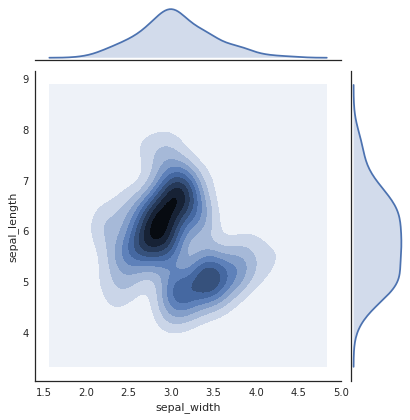

In [6]:
# Plot two-dimension data using a Seaborn jointplot, which 
# can show 1D and 2D KDE plots, for both the joint distribution 
# and each dimension

ax = sns.jointplot(x='sepal_width', y='sepal_length', data=iris, kind='kde', stat_func=None)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we created a visualization for the two _Sepal_ dimensions by using a kernel density estimator for the Iris data. In the empty **Code** cell below, write and execute code that repeats the last example but make the following changes.

1. Change the code to use the _Petal_ dimensions and visualize the results.
2. Change the kernel function, when using scikit learn, to one of the other [kernels][skf]. How do the results change?
3. Make a _jointplot_ using one _Sepal_ and one _Petal_ dimension. How do the results change?

[skf]: http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

## Handwritten Digits

We now switch to a different dataset, an application of density
estimation. We can make a density estimate of the handwritten digit data
set to create new _fake digit_ data (this example was drawn from the
[scikit-learn documentation][sk-kde]). This application is an example of using the density estimate as a model for the underlying data and subsequently sampling from this model to create and use new data. In the following code cell, we load the data and review several digit images. 

-----
[sk-kde]: http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#example-neighbors-plot-digits-kde-sampling-py

Total number of samples = 1797


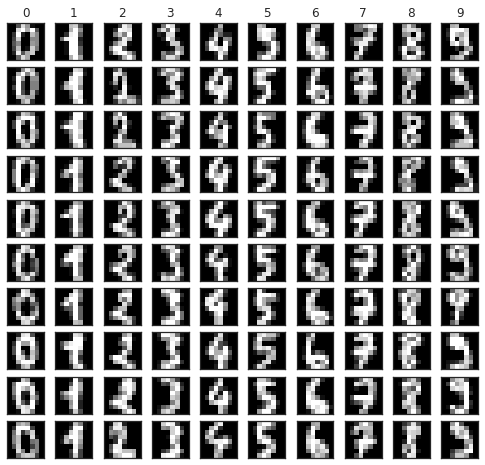

In [7]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

Now that we have the digit data loaded into this notebook, we can construct our density estimate.  As the cell output demonstrates, this simple model can quite easily generate realistic new digit data. Note that the first row is from the original data, while the other six rows are sampled form our KDE model representation.

-----

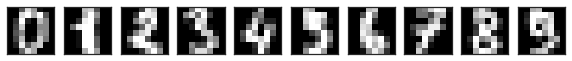

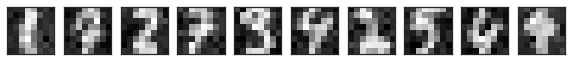

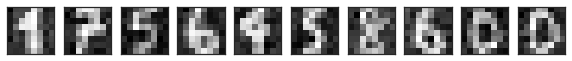

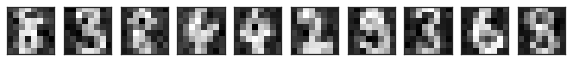

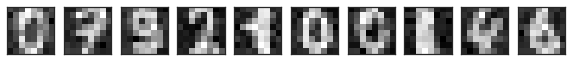

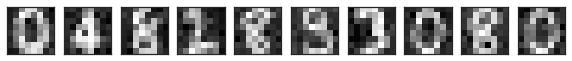

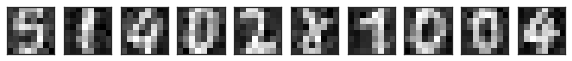

In [8]:
# Testing parameters
bw = 1.5 # Could do grid search to determine
nimgs = 60 # Multiple of ten

# Compute KDE for PCAs
kde = KernelDensity(bandwidth=bw)
kde.fit(x)

# Sample from model, and recover full image
new_data = kde.sample(nimgs, random_state=42)

# Plot input data
hd.plot_numbers(x[:10])

for idx in range(0, nimgs, 10):
    hd.plot_numbers(new_data[0 + idx:10 + idx])

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used Kernel Density Estimation to build a model representation of the digit data and to subsequently sample from this model to make new digit images. In the empty **Code** cell below, write and execute code that makes the following changes.

2. Change the bandwidth used in the KDE estimator. How does this affect the fidelity of the new digit images?
3. Try using a different kernel function, for example an `exponential` or `epanechnikov`. How does this affect the fidelity of the new digit images?

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

4. Wikipedia article on [Kernel Density Estimation][4]
1. [Seaborn Density Estimation][1]
2. [Scikit Learn 1-D Kernel Density Estimation][2]
3. A [detailed comparison][dec] between different kernel density estimation techniques by Jake VanderPlas

-----

[1]: http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
[2]: http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
[4]: https://en.wikipedia.org/wiki/Kernel_density_estimation
[dec]: https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 